# Recommender Systems

![Image](./img/goal_recommender_systems.jpg)

# Data  and methods

- __Explicit Feedback:__ direct and quantitative data collected from users.

- __Implicit Feedback:__ data collected indirectly from user interactions, and they act as a proxy for user preference.

![Image](./img/recommender_systems_methods.png)

---

## Collaborative filtering methods

- Based on past user-item iteractions.

- Detect similar users or similar items.

- Memory based (nearest neighbours) and Model based (underlying generative model).

- Require no info about the users or items.

- More interactions => More accuracy.

In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()

# Scipy
from scipy.spatial.distance import pdist, squareform   # conda install -c anaconda scipy

[SciPy](https://scipy.github.io/devdocs/reference/index.html) contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

### Dataset EDA

In [2]:
movie_ratings = pd.read_csv('./datasets/movie_ratings.csv').set_index('Movie')
movie_ratings

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Aquaman,4,1,2,2,2
Avengers: Infinity War,2,5,2,5,5
Black Panther,5,2,5,1,1
Bohemian Rhapsody,2,3,4,4,1
Deadpool 2,3,2,4,5,1
Fantastic Beasts: The Crimes of Grindelwald,5,4,1,2,5
Incredibles 2,4,2,3,4,4
Jurassic World: Fallen Kingdom,2,3,5,4,5
Mission: Impossible – Fallout,5,5,4,3,2


In [3]:
users_ratings = movie_ratings.T
users_ratings

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Brandon,4,2,5,2,3,5,4,2,5,4
Emily,1,5,2,3,2,4,2,3,5,1
Cleo,2,2,5,4,4,1,3,5,4,4
Rusty,2,5,1,4,5,2,4,4,3,5
Samantha,2,5,1,1,1,5,4,5,2,2


In [4]:
movies = list(users_ratings.columns)
users_ratings.iplot(y=movies,
                    kind='line',
                    width=10.0,
                    subplots=True,
                    fill=True,
                    title='Ratings per movie');

---

## User-user memory based method

It represent users based on their interactions with items and evaluate distances between users.

In [5]:
# Ploting function

def ratings_scatter(movie1, movie2):
    x = users_ratings[movie1]
    y = users_ratings[movie2]
    n = list(users_ratings.index)

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=100)
    fig.set_figwidth(12)
    fig.set_figheight(8)
    plt.title("Preference Space for "+ movie1 + " vs. " + movie2, fontsize=20)
    ax.set_xlabel(movie1, fontsize=16)
    ax.set_ylabel(movie2, fontsize=16) 

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), fontsize=12)

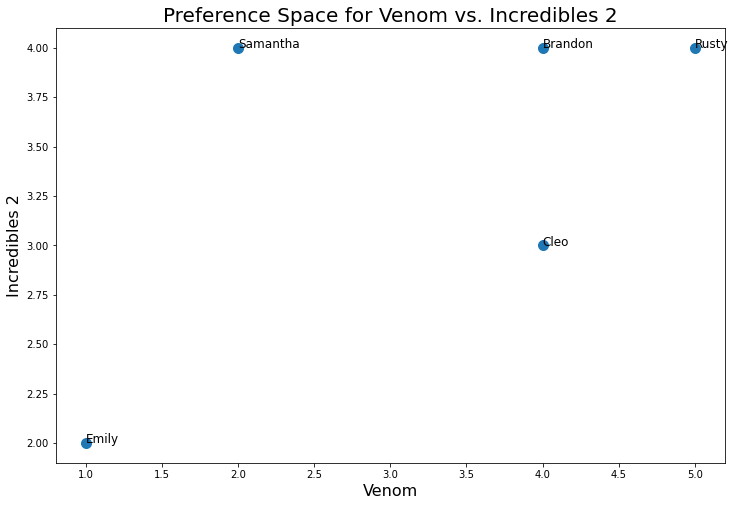

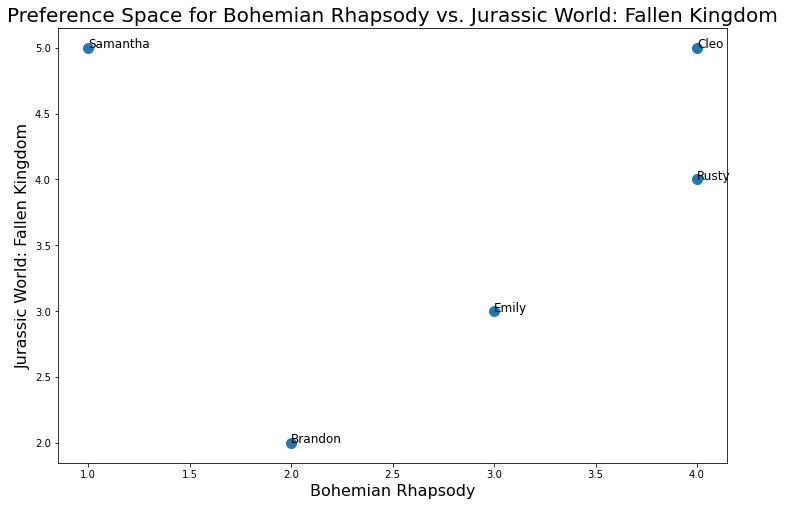

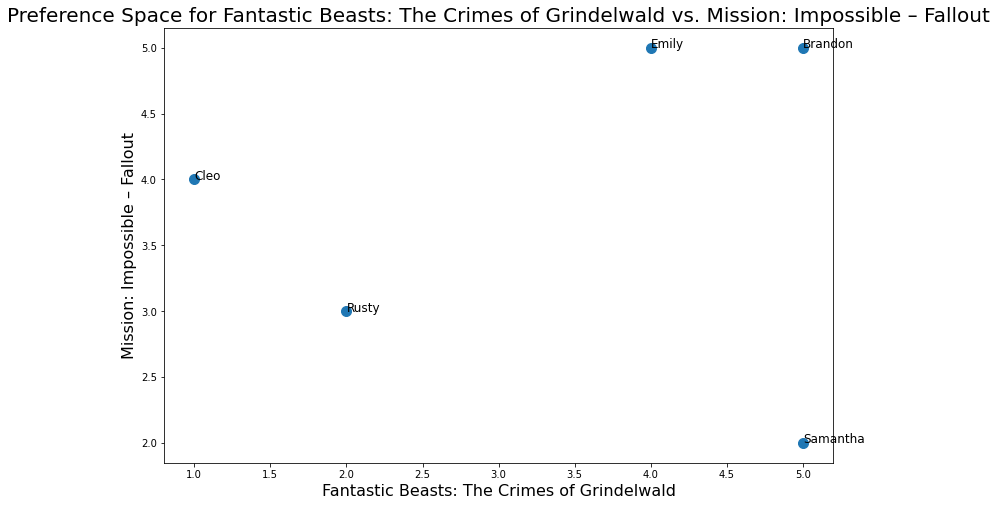

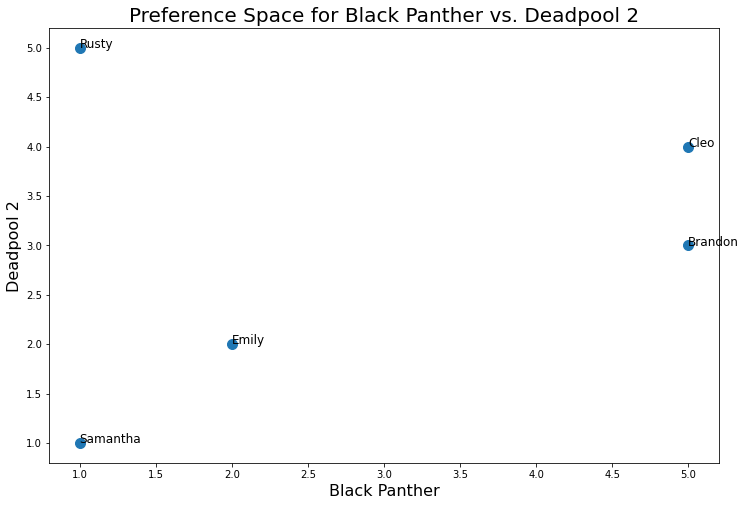

In [6]:
# 2 dimensional space

ratings_scatter('Venom', 'Incredibles 2')
ratings_scatter('Bohemian Rhapsody', 'Jurassic World: Fallen Kingdom')
ratings_scatter('Fantastic Beasts: The Crimes of Grindelwald', 'Mission: Impossible – Fallout')
ratings_scatter('Black Panther', 'Deadpool 2')

---

### scipy.spatial.distance.pdist

Pairwise distances between observations in n-dimensional space.

https://scipy.github.io/devdocs/reference/generated/scipy.spatial.distance.pdist.html

In [7]:
dist_calculation = pdist(X=users_ratings, metric='euclidean')
dist_calculation

array([6.63324958, 6.        , 7.41619849, 7.48331477, 6.92820323,
       6.40312424, 5.09901951, 5.56776436, 8.24621125, 6.70820393])

In [8]:
# Squareform method: https://scipy.github.io/devdocs/reference/generated/scipy.spatial.distance.squareform.html

dist_distribution = squareform(dist_calculation)
dist_distribution

array([[0.        , 6.63324958, 6.        , 7.41619849, 7.48331477],
       [6.63324958, 0.        , 6.92820323, 6.40312424, 5.09901951],
       [6.        , 6.92820323, 0.        , 5.56776436, 8.24621125],
       [7.41619849, 6.40312424, 5.56776436, 0.        , 6.70820393],
       [7.48331477, 5.09901951, 8.24621125, 6.70820393, 0.        ]])

In [9]:
euclid_dist = pd.DataFrame(dist_distribution,
                           index=movie_ratings.columns, 
                           columns=movie_ratings.columns)

euclid_dist

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,0.000000,6.633250,6.000000,7.416198,7.483315
Emily,6.633250,0.000000,6.928203,6.403124,5.099020
Cleo,6.000000,6.928203,0.000000,5.567764,8.246211
Rusty,7.416198,6.403124,5.567764,0.000000,6.708204
Samantha,7.483315,5.099020,8.246211,6.708204,0.000000


In [10]:
# Frame of reference

euclid_dist_norm = pd.DataFrame(1/(1 + squareform(pdist(users_ratings, 'euclidean'))),
                                index=movie_ratings.columns,
                                columns=movie_ratings.columns)

euclid_dist_norm

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


---

### Full Pipeline

In [11]:
# New User into the system

Tom = {'Aquaman': 2,
       'Avengers: Infinity War': 1,
       'Black Panther': 5,
       'Bohemian Rhapsody': 5,
       'Deadpool 2': 2,
       'Fantastic Beasts: The Crimes of Grindelwald': 3,
       'Incredibles 2': 3,
       'Jurassic World: Fallen Kingdom': 4,
       'Mission: Impossible – Fallout': 3,
       'Venom': 3}

In [12]:
movie_ratings['Tom'] = pd.Series(Tom)
movie_ratings

,Brandon,Emily,Cleo,Rusty,Samantha,Tom
Movie,,,,,,
Aquaman,4,1,2,2,2,2
Avengers: Infinity War,2,5,2,5,5,1
Black Panther,5,2,5,1,1,5
Bohemian Rhapsody,2,3,4,4,1,5
Deadpool 2,3,2,4,5,1,2
Fantastic Beasts: The Crimes of Grindelwald,5,4,1,2,5,3
Incredibles 2,4,2,3,4,4,3
Jurassic World: Fallen Kingdom,2,3,5,4,5,4
Mission: Impossible – Fallout,5,5,4,3,2,3


In [13]:
# Distances calculation in the n-dimensional space

euclid_dist_norm = pd.DataFrame(1/(1 + squareform(pdist(movie_ratings.T, 'euclidean'))),
                                index=movie_ratings.columns,
                                columns=movie_ratings.columns)

euclid_dist_norm

,Brandon,Emily,Cleo,Rusty,Samantha,Tom
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878,0.156613
Emily,0.131006,1.000000,0.126132,0.135078,0.163961,0.135078
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152,0.217129
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732,0.126132
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000,0.116961
Tom,0.156613,0.135078,0.217129,0.126132,0.116961,1.000000


In [14]:
# Similarities to the new User

euclid_simil_norm = euclid_dist_norm['Tom'].sort_values(ascending=False)[1:]
euclid_simil_norm

Cleo        0.217129
Brandon     0.156613
Emily       0.135078
Rusty       0.126132
Samantha    0.116961
Name: Tom, dtype: float64

In [15]:
# Movies that the new User user hasn't watched

movie_ratings_test = pd.read_csv('./datasets/movie_ratings_test.csv').set_index('Movie')
recommend_euclid = movie_ratings_test.copy()
recommend_euclid

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,2,5,2,5,2
Despicable Me 3,4,5,5,1,2
Guardians of the Galaxy Vol. 2,4,1,5,4,2
Jumanji: Welcome to the Jungle,4,3,3,2,5
Spider-Man: Homecoming,1,3,5,2,5
Star Wars: The Last Jedi,5,4,1,2,2
The Fate of the Furious,2,1,3,3,3
Thor: Ragnarok,4,3,4,1,5
Wolf Warrior 2,5,3,2,3,4


In [16]:
# Similarities to the new User (we need to reassemble the data)

euclid_simil_items = dict(euclid_simil_norm).items()
euclid_simil_items

dict_items([('Cleo', 0.21712927295533244), ('Brandon', 0.1566130288262323), ('Emily', 0.13507810593582123), ('Rusty', 0.1261319836228832), ('Samantha', 0.11696132920126338)])

In [17]:
# Movies matrix weights by user

for name, score in euclid_simil_items:
    recommend_euclid[name] = recommend_euclid[name] * score
recommend_euclid

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,0.313226,0.675391,0.434259,0.630660,0.233923
Despicable Me 3,0.626452,0.675391,1.085646,0.126132,0.233923
Guardians of the Galaxy Vol. 2,0.626452,0.135078,1.085646,0.504528,0.233923
Jumanji: Welcome to the Jungle,0.626452,0.405234,0.651388,0.252264,0.584807
Spider-Man: Homecoming,0.156613,0.405234,1.085646,0.252264,0.584807
Star Wars: The Last Jedi,0.783065,0.540312,0.217129,0.252264,0.233923
The Fate of the Furious,0.313226,0.135078,0.651388,0.378396,0.350884
Thor: Ragnarok,0.626452,0.405234,0.868517,0.126132,0.584807
Wolf Warrior 2,0.783065,0.405234,0.434259,0.378396,0.467845


In [18]:
# Movies matrix weights cosidering all users (i.e.: Total Weight per Movie)

recommend_euclid['Total Weight per Movie'] = recommend_euclid.sum(axis=1)
recommend_euclid = recommend_euclid.sort_values('Total Weight per Movie', ascending=False)
recommend_euclid

,Brandon,Emily,Cleo,Rusty,Samantha,Total Weight per Movie
Movie,,,,,,
Despicable Me 3,0.626452,0.675391,1.085646,0.126132,0.233923,2.747544
Wonder Woman,0.626452,0.405234,0.868517,0.378396,0.467845,2.746445
Thor: Ragnarok,0.626452,0.405234,0.868517,0.126132,0.584807,2.611142
Guardians of the Galaxy Vol. 2,0.626452,0.135078,1.085646,0.504528,0.233923,2.585627
Jumanji: Welcome to the Jungle,0.626452,0.405234,0.651388,0.252264,0.584807,2.520145
Spider-Man: Homecoming,0.156613,0.405234,1.085646,0.252264,0.584807,2.484564
Wolf Warrior 2,0.783065,0.405234,0.434259,0.378396,0.467845,2.468799
Beauty and the Beast,0.313226,0.675391,0.434259,0.630660,0.233923,2.287458
Star Wars: The Last Jedi,0.783065,0.540312,0.217129,0.252264,0.233923,2.026693


In [19]:
# Our recommendation for Tom!!!

top5_movies_euclid = recommend_euclid[['Total Weight per Movie']].head()
top5_movies_euclid

,Total Weight per Movie
Movie,
Despicable Me 3,2.747544
Wonder Woman,2.746445
Thor: Ragnarok,2.611142
Guardians of the Galaxy Vol. 2,2.585627
Jumanji: Welcome to the Jungle,2.520145


---

### Cosine similarity

Cosine similarity is generally used as a metric for measuring distance when the magnitude of the vectors does not matter and low complexity is required.

![Image](./img/cosine_similarity.jpg)

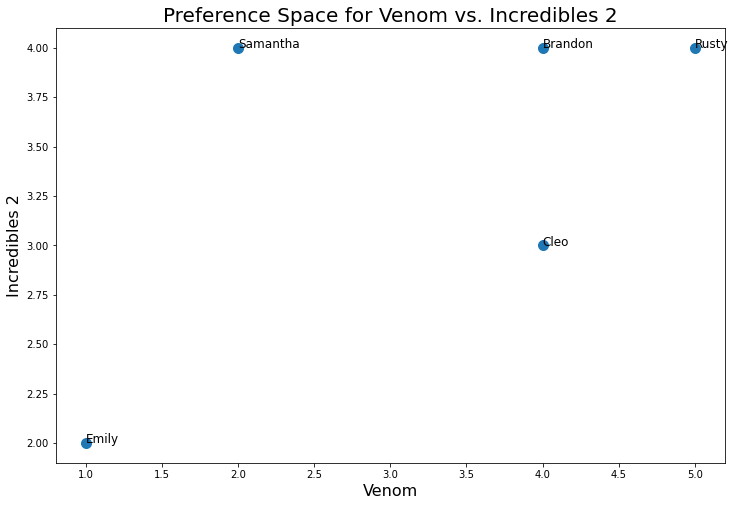

In [20]:
# 2 dimensional space

ratings_scatter('Venom', 'Incredibles 2')

In [21]:
# Cosine similarity calculation in the n-dimensional space 

movie_ratings = pd.read_csv('./datasets/movie_ratings.csv').set_index('Movie')
movie_ratings['Tom'] = pd.Series(Tom)
cosine_dist_norm = pd.DataFrame(1/(1 + squareform(pdist(movie_ratings.T, 'cosine'))),
                                index=movie_ratings.columns,
                                columns=movie_ratings.columns)

cosine_dist_norm

,Brandon,Emily,Cleo,Rusty,Samantha,Tom
Brandon,1.000000,0.857174,0.885260,0.838267,0.823128,0.903988
Emily,0.857174,1.000000,0.833399,0.863703,0.887485,0.837091
Cleo,0.885260,0.833399,1.000000,0.898415,0.780388,0.952432
Rusty,0.838267,0.863703,0.898415,1.000000,0.851898,0.844111
Samantha,0.823128,0.887485,0.780388,0.851898,1.000000,0.792094
Tom,0.903988,0.837091,0.952432,0.844111,0.792094,1.000000


In [22]:
# Our recommendation for Tom using Cosine Similarity

movie_ratings_test = pd.read_csv('./datasets/movie_ratings_test.csv').set_index('Movie')
recommend_cosine = movie_ratings_test.copy()
cosine_simil_norm = cosine_dist_norm['Tom'].sort_values(ascending=False)[1:]
cosine_simil_items = dict(cosine_simil_norm).items()
for name, score in cosine_simil_items:
    recommend_cosine[name] = recommend_cosine[name] * score
recommend_cosine['Total Weight per Movie'] = recommend_cosine.sum(axis=1)
recommend_cosine = recommend_cosine.sort_values('Total Weight per Movie', ascending=False)
top5_movies_cosine = recommend_cosine[['Total Weight per Movie']].head()
top5_movies_cosine

,Total Weight per Movie
Movie,
Wonder Woman,15.637662
Despicable Me 3,14.991867
Thor: Ragnarok,14.741533
Wolf Warrior 2,14.636786
Jumanji: Welcome to the Jungle,14.633212


---